강사 : 박준용 강사님

일시 : 2020-07-13(월) ~ 2020-07-

---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore') 

# 교통사고 데이터

In [5]:
data = pd.read_csv('./data/Traffic_Accident_2017.csv', encoding = 'euc-kr')
data.T

,0,1,2,3,4,5,6,7,8,9,...,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064
발생년,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
발생년월일시,2017010101,2017010102,2017010102,2017010102,2017010104,2017010104,2017010105,2017010109,2017010118,2017010120,...,2017123023,2017123100,2017123107,2017123112,2017123117,2017123118,2017123118,2017123119,2017123120,2017123123
발생분,15,28,43,22,37,0,50,25,33,0,...,50,50,4,10,56,10,25,55,40,15
주야,야간,야간,야간,야간,야간,야간,야간,주간,야간,야간,...,야간,야간,주간,주간,주간,야간,야간,야간,야간,야간
요일,일,일,일,일,일,일,일,일,일,일,...,토,일,일,일,일,일,일,일,일,일
사망자수,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
사상자수,2,1,2,1,1,2,1,5,3,7,...,6,1,1,1,1,4,1,1,11,1
중상자수,1,0,0,0,0,1,0,3,1,4,...,2,0,0,0,0,1,0,0,1,0
경상자수,0,0,1,0,0,0,0,1,1,2,...,3,0,0,0,0,0,0,0,9,0
부상신고자수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [6]:
# matplotlib 한글 폰트 적용
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

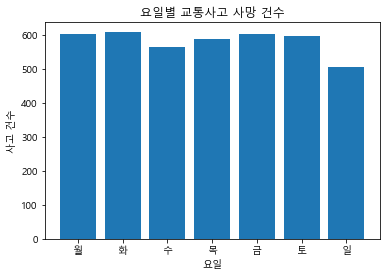

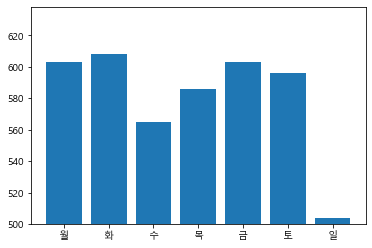

In [19]:
# 어느 요일별 사망자 수
t = data['요일'].value_counts()
x = ['월', '화', '수', '목', '금', '토', '일']
y = t[x]



plt.subplots()
plt.bar(x, y)
plt.title("요일별 교통사고 사망 건수")
plt.ylabel('사고 건수')
plt.xlabel('요일')


plt.subplots()
plt.bar(x, y)
plt.ylim(500,)

plt.show();

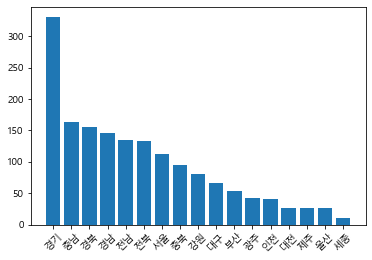

In [31]:
# 어느 지역에서 차대차 사고가 많이 날까?
t = data[data['사고유형_대분류'] == '차대차']['발생지시도'].value_counts()
x = t.index
y = t.values

plt.bar(x, y)
plt.xticks(rotation=45)
plt.show();

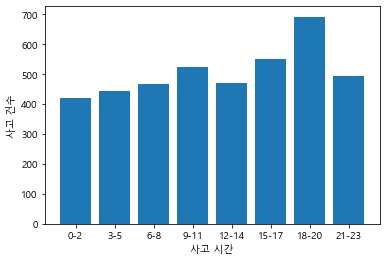

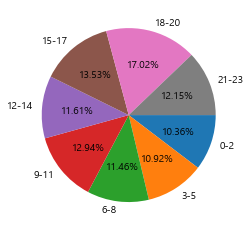

In [67]:
# 교통사고 다발 시간대 확인
t = data['발생년월일시'].apply(lambda x: int(str(x)[-2:]))
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labs = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20', '21-23']
t_cats = pd.cut(t, bins, right=False, labels=labs)

new_t = t_cats.value_counts()
x = labs
y = new_t[labs]

plt.subplots()
plt.bar(x, y)
plt.xlabel('사고 시간')
plt.ylabel('사고 건수')

plt.subplots()
plt.pie(new_t[labs], labels = labs, counterclock=False, autopct='%1.2f%%');

# 남북한 발전 전력량

In [69]:
data2 = pd.read_excel('./data/남북한발전전력량.xlsx')
data2

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


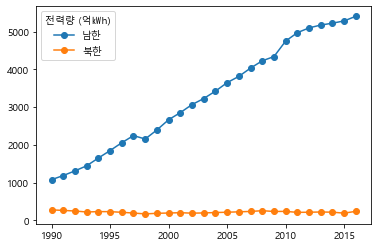

In [99]:
data2.iloc[0:5 , 0] = data2.iloc[0:5, 0].apply(lambda x: '남한')
data2.iloc[5: , 0] = data2.iloc[5:, 0].apply(lambda x: '북한')

df2 = data2[data2['발전 전력별'] == '합계']
df2 = df2.T

new_header = df2.iloc[0]
df2 = df2[2:] 
df2.columns = new_header 

ax = df2.plot(marker='o');